<a href="https://colab.research.google.com/github/ravi-prakash1907/Machine-Learning-for-Cyber-Security/blob/main/Spam%20Filtering/Emails/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Spam EMail Classification using SVM

In [43]:
#Import Library
from sklearn import svm
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import warnings
warnings.filterwarnings('ignore')

In [44]:
## fun. to download the data from any url
def downloadData(fileURL, saveAs='downloaded'):
  req = requests.get(fileURL)
  fileURLContent = req.content
  data = open(saveAs, 'wb')
  
  data.write(fileURLContent)
  data.close()

In [45]:
## location of the file
testURL = 'https://raw.githubusercontent.com/ravi-prakash1907/Machine-Learning-for-Cyber-Security/main/Spam%20Filtering/Emails/dataset/test.csv?token=AJGAAOAOB4K7A6XAM3SESQDAVTDTO'
trainURL = 'https://raw.githubusercontent.com/ravi-prakash1907/Machine-Learning-for-Cyber-Security/main/Spam%20Filtering/Emails/dataset/train.csv?token=AJGAAOCAXYB66IEI7SNY753AVTDU6'

## downloading the from url
downloadData(testURL,'test.csv')
downloadData(trainURL,'train.csv')

In [46]:
#Load Train and Test datasets
#Identify feature and response variable(s) and values must be numeric and numpy arrays
train=pd.read_csv('train.csv')
train.head()

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,3,5,3,2,3,1,24,1,2,2,7,5,0,1,18,3,0,1,1,1,0,2,1,22,0,3,1,3,0,0,0,7,0,5,0,1,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,3,1,1,3,0,14,1,0,5,3,1,1,0,13,1,0,1,0,0,0,2,0,6,2,0,0,0,0,2,0,5,0,4,0,0,2,0,0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,3,10,6,5,2,67,2,2,4,9,5,1,7,34,3,0,0,2,1,1,1,3,15,2,2,0,0,3,3,1,12,0,8,4,2,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,11,13,1,15,5,6,132,15,2,26,19,7,1,0,124,2,2,0,2,2,7,11,3,88,0,17,3,8,8,1,0,11,1,12,0,3,0,0,3,20,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,8,0,0,0,1,0,0
4,0,1,1,0,1,0,2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
train.shape

(3705, 3001)

In [48]:
train.describe()

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,...,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000
mean,7.315250,6.817274,5.623482,3.425101,3.347638,2.944399,61.378677,2.731444,2.249123,11.842105,12.145479,5.945749,1.538462,1.429150,50.989204,3.563563,1.020783,0.940621,0.866937,1.048313,0.913360,7.669366,2.170850,46.227800,1.523347,5.028610,0.726046,2.005668,5.319028,0.896626,0.671525,8.570310,0.930094,5.902024,0.758435,1.330094,0.603239,0.517139,0.683941,10.029420,...,0.007287,0.006208,0.004858,0.005128,0.004588,0.010526,0.005938,0.006748,0.009987,0.004049,0.004588,0.007018,0.077193,0.005128,0.011066,0.006748,0.006208,0.020783,0.007557,0.018623,0.007557,0.005938,0.007287,0.005938,0.008907,0.041026,0.008907,0.004858,0.005398,0.004588,0.006208,0.009987,0.011606,0.114980,0.005668,0.007557,0.004318,1.011336,0.007557,0.315520
std,12.109759,10.035403,15.535820,6.376368,4.902237,6.662987,94.339064,4.543817,7.637032,20.695459,19.502441,9.501877,2.994991,5.027829,83.067359,5.402315,2.169480,2.219401,1.465717,2.191208,2.117575,13.756502,3.877054,70.756926,2.700703,8.887602,1.315194,12.784483,8.179660,1.762292,2.017823,13.462109,1.884839,8.766953,1.947668,2.441281,2.108476,1.495237,1.192455,15.264318,...,0.130213,0.081920,0.080348,0.078633,0.067591,0.244038,0.076839,0.121669,0.119202,0.094302,0.071474,0.092683,0.390188,0.075122,0.147464,0.091235,0.094185,0.213856,0.101005,0.152122,0.155695,0.083571,0.096934,0.080276,0.189282,0.251220,0.102224,0.073321,0.086777,0.169902,0.119458,0.149360,0.119055,0.631477,0.112503,0.148597,0.076947,3.073766,0.106217,0.464785
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,14.000000,0.000000,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000

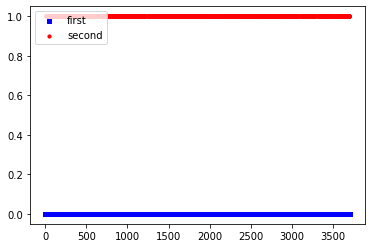

In [49]:
zeros = train[train['Prediction'] == 0]
ones = train[train['Prediction'] == 1]

x0 = zeros.index
y0 = zeros['Prediction']

x1 = ones.index
y1 = ones['Prediction']

plt.scatter(x0, y0, s=10, c='b', marker="s", label='first')
plt.scatter(x1,y1, s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left');
plt.show()

In [50]:
train_y=train['Prediction'] ## predictions
train_x=train.drop(['Prediction'],axis=1) ## dependent var

In [51]:
test=pd.read_csv('test.csv')
test.head()

,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,re,...,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,6,6,7,3,5,0,43,2,3,11,7,12,7,0,38,1,0,1,2,1,0,3,3,47,1,2,1,0,4,0,1,9,3,3,1,0,0,1,0,10,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,10,3,1,0,1,1,9,1,0,2,3,2,0,0,9,1,1,1,1,0,0,3,1,8,0,0,0,0,1,4,0,1,0,2,0,0,1,0,0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,14,21,40,8,12,3,131,4,18,27,36,13,4,3,108,5,5,3,6,0,1,19,8,100,0,4,1,0,19,1,3,26,0,5,0,1,0,0,4,13,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,3,4,1,4,0,26,0,1,0,8,1,0,2,17,0,0,0,0,0,0,3,0,18,3,1,1,0,1,1,0,10,1,3,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,4,1,0,0,1,12,1,0,4,0,3,2,0,16,1,0,0,0,0,0,2,1,19,0,3,0,2,0,2,0,1,0,1,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [55]:
test_y=test['Prediction']
test_x=test.drop(['Prediction'],axis=1)

In [56]:
# Create Linear SVM object
support = svm.LinearSVC(random_state=20)

In [57]:
# Train the model using the training sets and check score on test dataset
support.fit(train_x, train_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=20, tol=0.0001,
          verbose=0)

In [58]:
predicted= support.predict(test_x)
predicted[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [59]:
given = test_y[:10]
list(given)

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [60]:
f1Score=f1_score(test_y,predicted)

accuracy=accuracy_score(test_y,predicted)
precision=precision_score(test_y,predicted)
recall=recall_score(test_y,predicted)

In [61]:
print("Model's Performance Measures:\n")
print("F1-Score: {} \nAccuracy: {} \nPrecision: {} \nRecall: {}".format(f1Score,accuracy,precision,recall))

Model's Performance Measures:

F1-Score: 0.9344827586206896 
Accuracy: 0.958963282937365 
Precision: 0.9409722222222222 
Recall: 0.928082191780822


Confusion matrix: 
 [[617  17]
 [ 21 271]] 



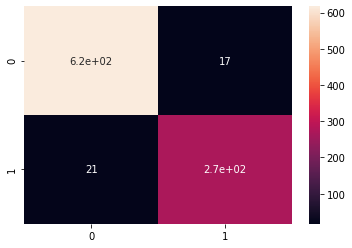

In [62]:
cf_matrix = confusion_matrix(test_y,predicted)
print("Confusion matrix: \n", cf_matrix, "\n")

sns.heatmap(cf_matrix, annot=True)

In [ ]:
train.to_csv( "pred.csv")